In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv("customer_data.csv")
df

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Count,Product_Category
0,1001,56,Female,122747,50,8,Clothing
1,1002,69,Male,75922,6,12,Clothing
2,1003,46,Male,68231,83,13,Sports
3,1004,32,Male,49301,60,11,Sports
4,1005,60,Male,111652,44,12,Clothing
...,...,...,...,...,...,...,...
995,1996,60,Male,35036,94,16,Sports
996,1997,64,Female,97275,3,25,Electronics
997,1998,62,Female,117756,94,4,Clothing
998,1999,35,Female,69416,6,8,Sports


In [54]:
df.shape

(1000, 7)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_ID       1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Gender            1000 non-null   object
 3   Annual_Income     1000 non-null   int64 
 4   Spending_Score    1000 non-null   int64 
 5   Purchase_Count    1000 non-null   int64 
 6   Product_Category  1000 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [56]:
df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Count
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,1500.500000,43.81900,82723.858000,49.47300,15.429000
std,288.819436,14.99103,37750.024987,27.76736,8.495713
min,1001.000000,18.00000,20162.000000,1.00000,1.000000
25%,1250.750000,31.00000,49102.250000,26.00000,8.000000
50%,1500.500000,44.00000,81445.000000,48.00000,16.000000
75%,1750.250000,56.00000,115009.750000,73.00000,23.000000
max,2000.000000,69.00000,149992.000000,99.00000,29.000000


In [57]:
df.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
Annual_Income       0
Spending_Score      0
Purchase_Count      0
Product_Category    0
dtype: int64

### 1.	Which age group makes the most purchases?

C:\Users\Ketan\AppData\Local\Temp\ipykernel_22484\1575823586.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchases=df.groupby('age_group')['Purchase_Count'].sum()


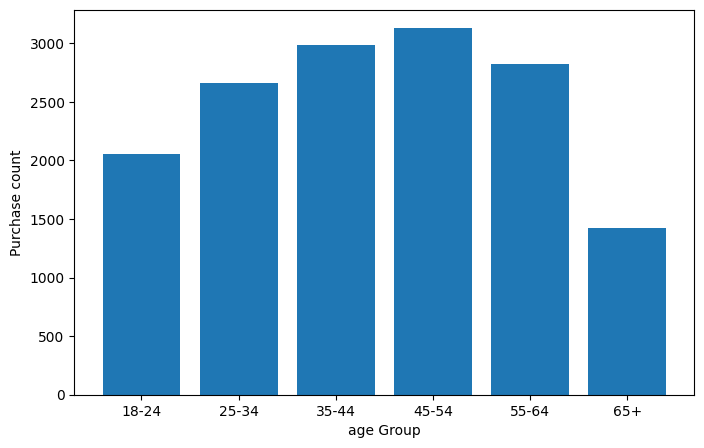

age_group
18-24    2055
25-34    2658
35-44    2988
45-54    3130
55-64    2824
65+      1420
Name: Purchase_Count, dtype: int64

In [90]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df['age_group']=pd.cut(df['Age'],bins=bins,labels=labels)
age_group_purchases=df.groupby('age_group')['Purchase_Count'].sum()
plt.figure(figsize=(8, 5))
plt.bar(age_group_purchases.index,age_group_purchases.values)
plt.xlabel('age Group')
plt.ylabel('Purchase count')
plt.show() 
age_group_purchases

##### "Customers aged 45-54 make the most purchases, suggesting they are a key target demographic. Marketing efforts should focus on this age group."

### 2. Which gender has the highest purchase count on average?

Gender
Female    7154
Male      7604
Other      671
Name: Purchase_Count, dtype: int64


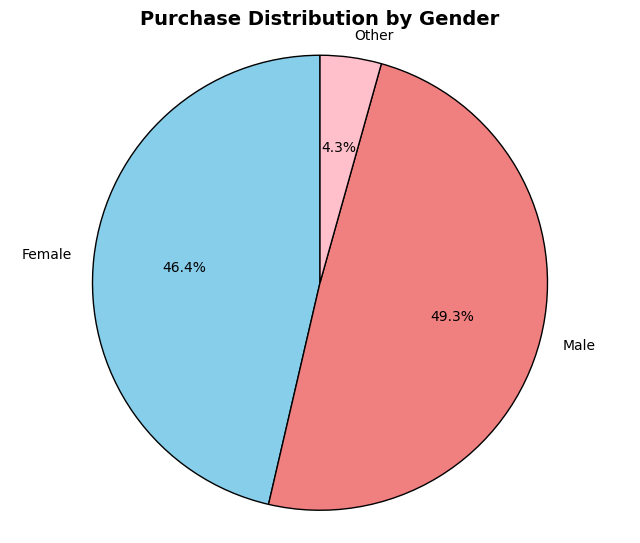

In [85]:
print(df.groupby('Gender')['Purchase_Count'].sum())
Gender_purchase_count=df.groupby('Gender')['Purchase_Count'].sum()
plt.figure(figsize=(8, 6.5))
plt.pie(Gender_purchase_count, labels=Gender_purchase_count.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral','pink'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Purchase Distribution by Gender', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show() 

##### Males slightly lead in total purchases (50.6%), but females also have a strong purchasing power (47.7%).A small percentage (1.7%) is categorized as "Other"

### 3.	Create a bar chart of product categories vs. total purchases

Product_Category
Clothing       3203
Electronics    2442
Furniture      3250
Groceries      3120
Sports         3414
Name: Purchase_Count, dtype: int64


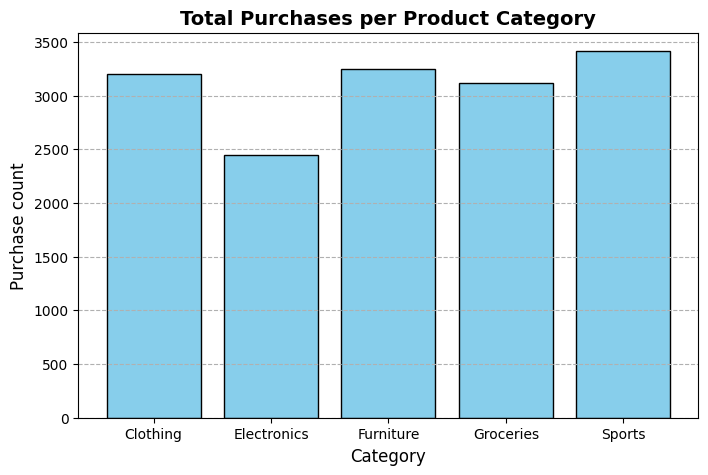

In [92]:
print(df.groupby('Product_Category')['Purchase_Count'].sum())
total_by_category=df.groupby('Product_Category')['Purchase_Count'].sum()
plt.figure(figsize=(8, 5))
plt.bar(total_by_category.index,total_by_category.values, color='skyblue',edgecolor='black')
plt.grid(axis='y', linestyle='--')
plt.xlabel('Category',fontsize='12')
plt.ylabel('Purchase count',fontsize='12')
plt.title('Total Purchases per Product Category', fontsize=14, fontweight='bold')
plt.show() 

#####  "Sports products have the highest purchases, indicating strong demand and need for more stock."

### 4.	What is the most popular product category for different age groups?

C:\Users\Ketan\AppData\Local\Temp\ipykernel_22484\2573040943.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_category_per_age = df.groupby('age_group')['Product_Category'].agg(lambda x: x.mode()[0])


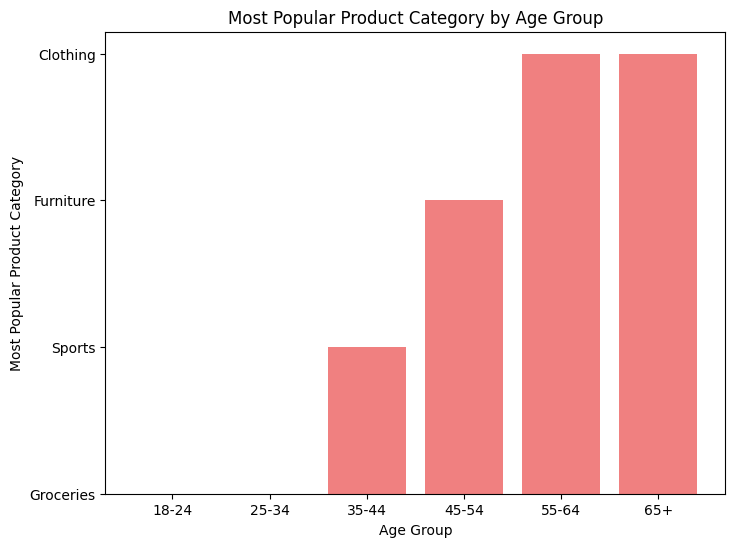

age_group
18-24    Groceries
25-34    Groceries
35-44       Sports
45-54    Furniture
55-64     Clothing
65+       Clothing
Name: Product_Category, dtype: object


In [91]:

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
popular_category_per_age = df.groupby('age_group')['Product_Category'].agg(lambda x: x.mode()[0])
plt.figure(figsize=(8, 6))
plt.bar(popular_category_per_age.index, popular_category_per_age.values, color='lightcoral')
plt.xlabel("Age Group")
plt.ylabel("Most Popular Product Category")
plt.title("Most Popular Product Category by Age Group")
plt.show()

print(popular_category_per_age)

#####  - Younger customers (18-24) prefer groceries, indicating frequent, small-value purchases.
#####  - Sports products are highly popular for ages 25-44.
#####  - Older customers (45-54) prefer furniture, while 65+ focus on clothing.

### 5.Find customers who made more than 20 purchases and their common product category.

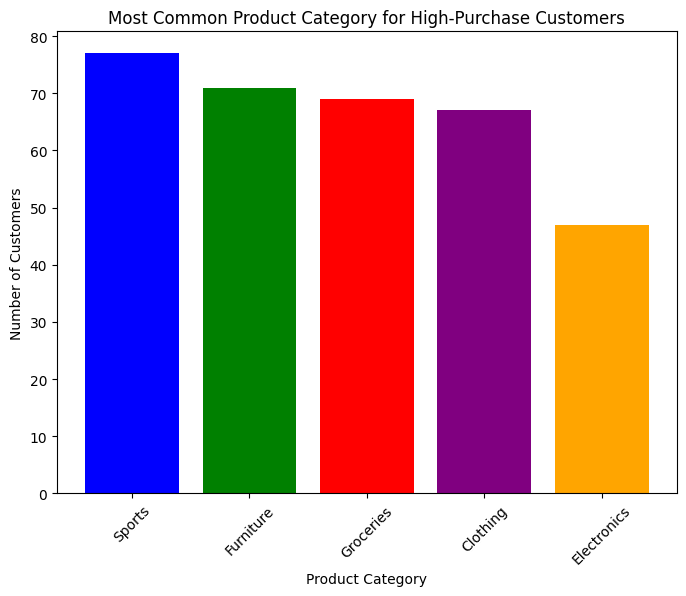

Product_Category
Sports         77
Furniture      71
Groceries      69
Clothing       67
Electronics    47
Name: count, dtype: int64


In [86]:
high_purchase =df[df['Purchase_Count']>20]
common_product=high_purchase['Product_Category'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(common_product.index,common_product.values,color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Product Category")
plt.ylabel("Number of Customers")
plt.title("Most Common Product Category for High-Purchase Customers")
plt.xticks(rotation=45)
plt.show()
print(common_product)

##### "Sports-related products are the top choice for repeat customers.This suggests a loyal customer base for fitness & sports-related goods."